# Structure of the notebooks :
    1. Compiling Examples
        considerations : random scaling , rotation , brightness invariant to reinforce homography in our stitching method
    2. Harris-Hessian Affine
    3. Illustrate working and issues

In [97]:
import numpy as np
import skimage
import os
import PIL # only for handling io of images

from PIL import Image

import matplotlib.pyplot as plt

In [98]:
!ls

difficult_examples     single_wide_images
image_stitching.ipynb  single_wide_images _rc


In [99]:
path = "single_wide_images"
example_set1 = os.listdir(path)
wide_examples = list()
for img in example_set1:
    loaded_image = Image.open(path +"/" + img)
    loaded_image = np.array(loaded_image)
    wide_examples.append(loaded_image)

for the single wide images we will split the images into randomly cropped 3 splits with enough overlap
and then try to reconstruct the image .. and then check the quality against the source image

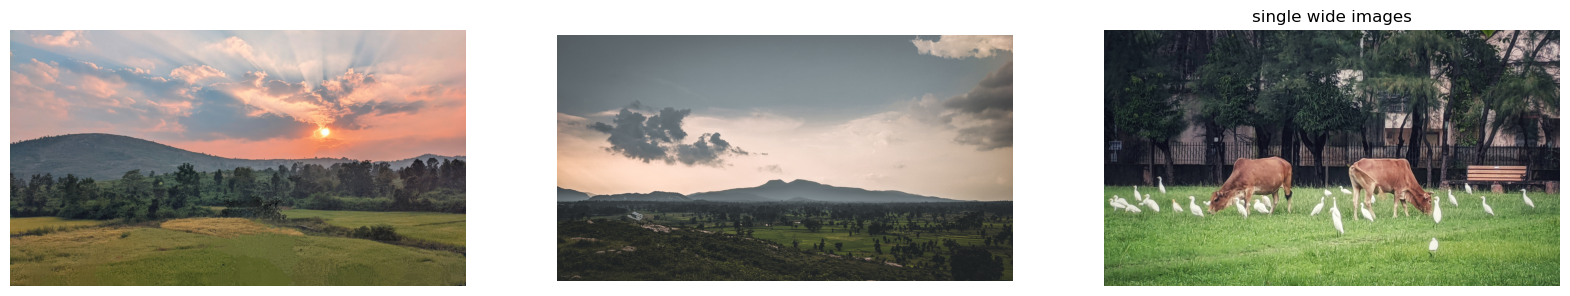

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes = axes.flatten()

for ax, img in zip(axes, wide_examples):
    ax.imshow(img)
    ax.axis('off')
plt.title("single wide images")
plt.show()

In [156]:
# something similar to pytorch's Five crop : https://pytorch.org/vision/stable/generated/torchvision.transforms.FiveCrop.html#torchvision.transforms.FiveCrop

def fourCrop(img,shared_context = None):
    h,w ,_ = img.shape
    shared_context = shared_context or int(np.min((h,w))/5) 
    print(f"Assuming overlap to be atleast of {shared_context}x{shared_context} ; For Descriptor to run")
    hor, vert  = int( h/2) , int( w/2)
    
    # stop a little later for left images
    # start a little earlier for right images
    # and similarly for vertical axis
    
    hor_stop = hor + shared_context
    hor_start = hor - shared_context
    ver_stop = vert + shared_context
    ver_start = vert - shared_context
    top_left = img[:hor_stop ,:ver_stop,:]
    bottom_left = img[hor_start:,:ver_start,:]
    top_right = img[:hor_stop,ver_start:,:]
    bottom_right = img[hor_start:, ver_start:,:]
    return top_left , top_right , bottom_left , bottom_right 


In [ ]:
tl , tr , bl ,br = fourCrop(wide_examples[2])
fig , ax = plt.subplot_mosaic("AB;CD")
ax["A"].imshow(tl)
ax["B"].imshow(tr)
ax["C"].imshow(bl)
ax["D"].imshow(br)
plt.show()




In [102]:
path = "difficult_examples"
example_set1 = os.listdir(path)
difficult_examples = list()
for img in example_set1:
    loaded_image = Image.open(path +"/" + img)
    loaded_image = np.array(loaded_image)
    difficult_examples.append(loaded_image)

In [103]:
len(difficult_examples)

6

These images are taken independently but have enough overlapping context to be stitched together
But here the true stitched image is unkown unlike the first example set (More realistic scenario)

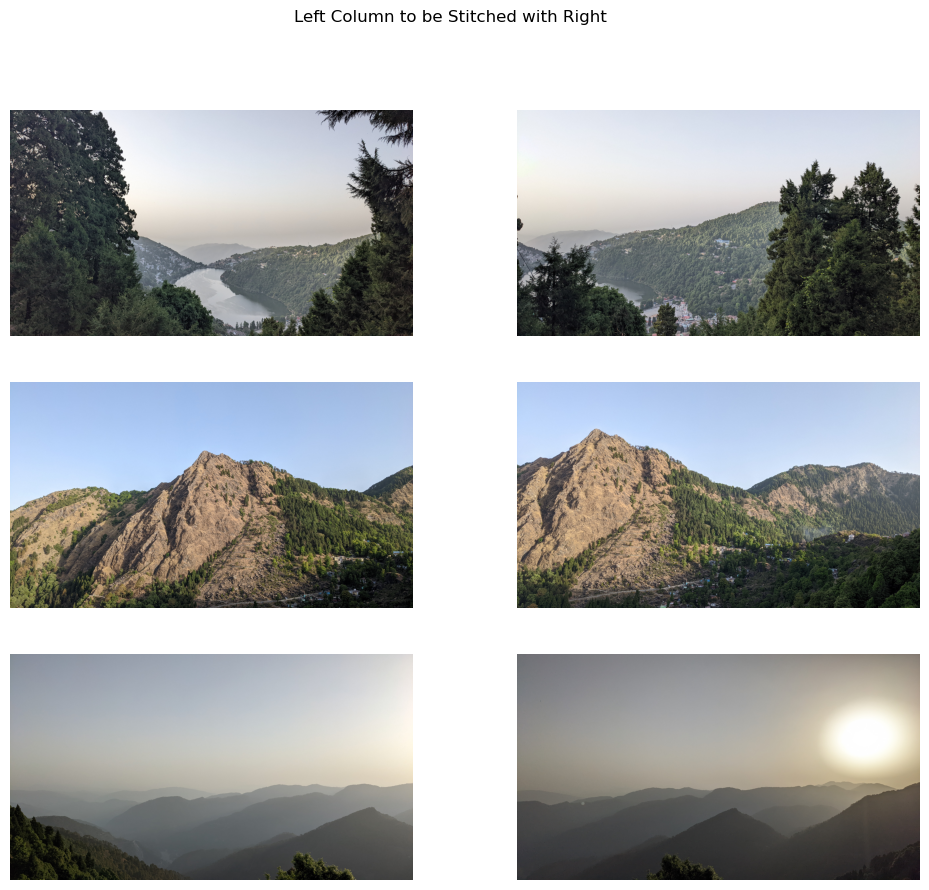

In [104]:
fig, ax = plt.figure(figsize=(12, 10)), {'A': 'AB;CD;EF'}
panel_to_index = {
    "A": 0,
    "B": 5,
    "C": 2,
    "D": 4,
    "E": 1,
    "F": 3
}
ax = fig.subplot_mosaic(ax['A'])

for panel, index in panel_to_index.items():
    ax[panel].imshow(difficult_examples[index])
    ax[panel].axis('off')

plt.suptitle('Left Column to be Stitched with Right', fontsize=12)
plt.grid()
plt.show()
